Load csv

In [3]:
from extract.extraction import CSVReader

df = CSVReader(r"C:\Users\CPKSoft\Desktop\proyectos\sepa_project\resources\transformed\completo_productos_transformed.csv", sep=",").load()

Searching for Coca Cola products

In [4]:
busqueda_coca = df.loc[df['productos_descripcion'].str.contains('Coca', na=False)]
busqueda_coca.loc[busqueda_coca['productos_cantidad_presentacion'] == 2.25]
busqueda_coca.loc[busqueda_coca['id_bandera'] != 2]

,Unnamed: 0,id_comercio,id_bandera,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia
958018,958018,9,1,698,7790895005466,1,"Combo Coca Cola 2,25L + Sprite 2,25L PCK-2-un.",2.0,unidad,COCA COLA,5120.0,2560.0,1.0,un.
958021,958021,9,1,19,7790895005466,1,"Combo Coca Cola 2,25L + Sprite 2,25L PCK-2-un.",2.0,unidad,COCA COLA,5120.0,2560.0,1.0,un.
958022,958022,9,3,662,7790895005466,1,"Combo Coca Cola 2,25L + Sprite 2,25L PCK-2-un.",2.0,unidad,COCA COLA,5120.0,2560.0,1.0,un.
958023,958023,9,1,119,7790895005466,1,"Combo Coca Cola 2,25L + Sprite 2,25L PCK-2-un.",2.0,unidad,COCA COLA,5120.0,2560.0,1.0,un.
958024,958024,9,1,692,7790895005466,1,"Combo Coca Cola 2,25L + Sprite 2,25L PCK-2-un.",2.0,unidad,COCA COLA,5120.0,2560.0,1.0,un.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968904,9968904,19,1,3338,7790895000782,1,Gase Coca Cola Pet 500 Ml,500.0,mL,Coca Cola,1810.0,3620.0,1.0,l
9968905,9968905,19,1,3339,7790895000782,1,Gase Coca Cola Pet 500 Ml,500.0,mL,Coca Cola,1770.0,3540.0,1.0,l
9968906,9968906,19,1,3296,7790895000782,1,Gase Coca Cola Pet 500 Ml,500.0,mL,Coca Cola,1770.0,3540.0,1.0,l
9968907,9968907,19,1,2,7790895000782,1,Gase Coca Cola Pet 500 Ml,500.0,mL,Coca Cola,1700.0,3400.0,1.0,l


In [5]:
busqueda_coca["id_producto"].value_counts()

id_producto
7790895642081    153
7790895000430    153
7790895001482    153
7790895067532    153
7790895067556    153
7790895639722    153
7790895000782    153
7790895642104    153
7790895000997    116
7790895005466     82
7790895006890     82
7790895007057     82
7790895648915     39
7790895006661     39
Name: count, dtype: int64

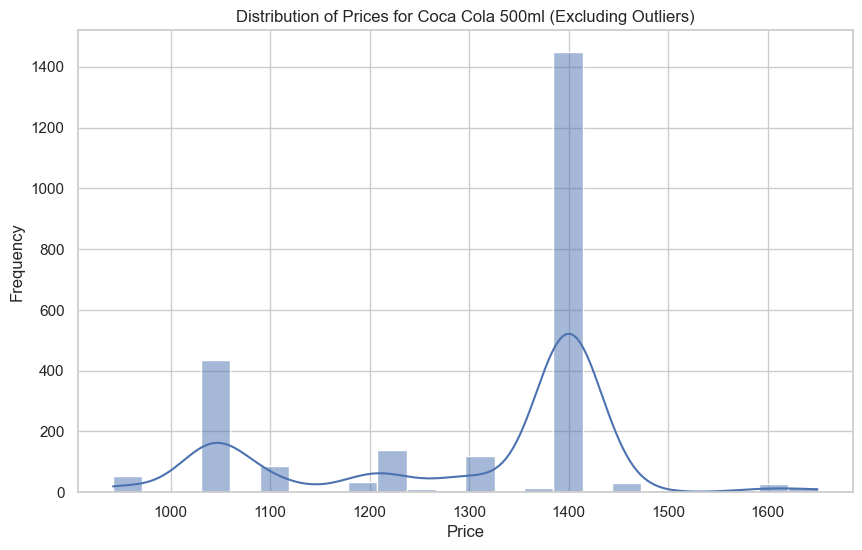

Count (excluding outliers): 2435
Max price: 1650.00
Min price: 942.00
Mean price: 1300.21
Median price: 1400.00
Outliers removed: 172


In [6]:
# df.loc[df['productos_marca'] == 'Coca Cola']

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

coca_cola_light_250 = df.loc[df['id_producto'] == 7790895000782]

sns.set_theme(style="whitegrid")

# Calculate Q1, Q3, and IQR
Q1 = coca_cola_light_250['productos_precio_lista'].quantile(0.25)
Q3 = coca_cola_light_250['productos_precio_lista'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
coca_cola_light_250_filtered = coca_cola_light_250[
    (coca_cola_light_250['productos_precio_lista'] >= lower_bound) &
    (coca_cola_light_250['productos_precio_lista'] <= upper_bound)
]

# Create a histogram of the price distribution without outliers
plt.figure(figsize=(10, 6))
sns.histplot(data=coca_cola_light_250_filtered, x='productos_precio_lista', kde=True)
plt.title('Distribution of Prices for Coca Cola 500ml (Excluding Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Print some statistics (excluding outliers)
print(f"Count (excluding outliers): {len(coca_cola_light_250_filtered)}")
print(f"Max price: {coca_cola_light_250_filtered['productos_precio_lista'].max():.2f}")
print(f"Min price: {coca_cola_light_250_filtered['productos_precio_lista'].min():.2f}")
print(f"Mean price: {coca_cola_light_250_filtered['productos_precio_lista'].mean():.2f}")
print(f"Median price: {coca_cola_light_250_filtered['productos_precio_lista'].median():.2f}")
print(f"Outliers removed: {len(coca_cola_light_250) - len(coca_cola_light_250_filtered)}")

C:\Users\CPKSoft\AppData\Local\Temp\ipykernel_7876\3244911888.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


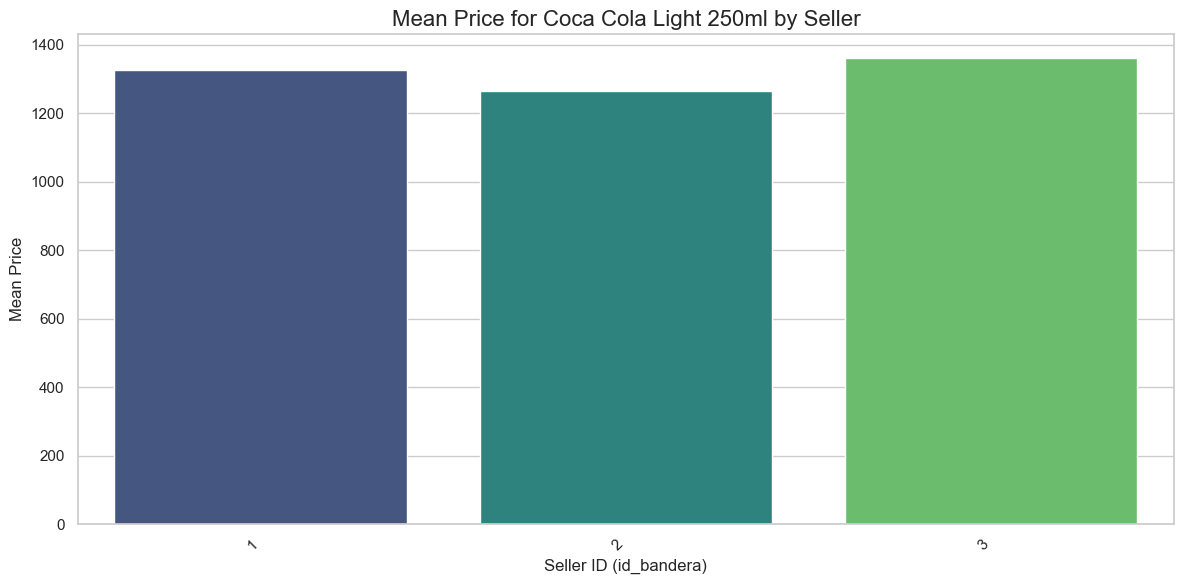

                   mean  median    min     max  count
id_bandera                                           
3           1361.917313  1400.0  684.0  1400.0    387
1           1327.313131  1400.0  910.0  1940.0   2063
2           1265.031847  1395.0  684.0  1400.0    157

Overall Statistics:
mean      1328.699267
median    1400.000000
min        684.000000
max       1940.000000
count     2607.000000
Name: productos_precio_lista, dtype: float64


In [7]:
# Group by id_bandera
grouped_data = df.loc[df['id_producto'] == 7790895000782].groupby('id_bandera')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate statistics for each group
stats = grouped_data['productos_precio_lista'].agg(['mean', 'median', 'min', 'max', 'count'])

# Sort the stats by mean price
stats_sorted = stats.sort_values('mean', ascending=False)

sns.set_theme(style="whitegrid")

# Create a bar plot of mean prices by id_bandera
plt.figure(figsize=(12, 6))
sns.barplot(
    x=stats_sorted.index,
    y='mean',
    data=stats_sorted,
    palette='viridis'
)

# Add titles and labels
plt.title('Mean Price for Coca Cola Light 250ml by Seller', fontsize=16)
plt.xlabel('Seller ID (id_bandera)', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

# Print statistics
print(stats_sorted)

# Calculate overall statistics
overall_stats = df.loc[df['id_producto'] == 7790895000782]['productos_precio_lista'].agg(['mean', 'median', 'min', 'max', 'count'])
print("\nOverall Statistics:")
print(overall_stats)
